
    1.Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
    2.Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
    3.Разделите данные на выборку для обучения и тестирования
    4.Постройте модель LDA
    5.Визуализируйте предсказания для тестовой выборки и центры классов
    6.Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
    7.Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию


In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Загружаем данные в датафрейм и оставляем два признака - sepal_length и sepal_width, т.к. они наименее скоррелированны, исходя из инфо выше по датасету (пункт Summary Statistics)

In [5]:
data = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width', 'petal_length', 'petal_width'])
df = data[['sepal_length', 'sepal_width']]
variety = iris.target
df

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [49]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, variety, test_size=0.30)

In [50]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)    #обучим наши данные

LinearDiscriminantAnalysis()

In [51]:
lda.predict(x_test)   # а теперь проведем тест над данными

array([2, 1, 0, 2, 2, 0, 1, 1, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 1, 2,
       2, 1, 0, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 2, 2, 2, 1, 0, 0, 2, 2,
       0])

In [52]:
# выведем в df полученные данные из lda
result = pd.DataFrame([y_test, lda.predict(x_test)]).T
result

,0,1
0,2,2
1,1,1
2,0,0
3,1,2
4,1,2
5,0,0
6,1,1
7,1,1
8,0,0
9,0,0


Произведем расчет точности, т.к. видим, что имеются ошибки.

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(x_test))

0.8444444444444444

Попробовав разные значения тестовой выборки, остановимся на значении 30% от общего числа. В таком случае, расчет точности будет вероятен к наивысшему значению и равняется 84,4%. Не идеально, но значение дает неправильный вывод только в 15,6% случаев, что уже неплохо.

Выведем коэффициенты дискриминатных линий и построим модель LDA.

In [54]:
lda.coef_

array([[-5.59344968,  8.50043873],
       [ 1.64214789, -4.30134958],
       [ 3.95130179, -4.19908915]])

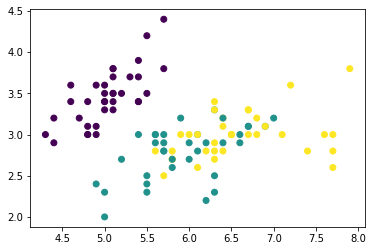

In [96]:
# визуализируем дискриминантную линию
plt.scatter(x_train['sepal_length'], x_train['sepal_width'], c=y_train)
plt.show()

In [59]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(x_train, y_train)

LinearDiscriminantAnalysis()

In [60]:
lda_small.means_

array([[5.03142857, 3.46285714],
       [5.94      , 2.78857143],
       [6.57428571, 2.98857143]])

Из визуализации и построенной LDA видно, что первый признак (sepal_length) больше влияет на кластеризацию данных (5,5 против 3).

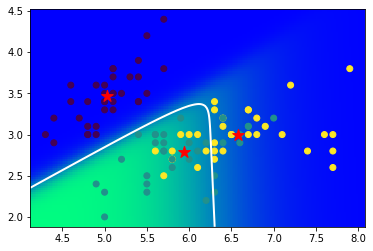

In [99]:
# сам scatter plot на все категории
plt.scatter(x_train['sepal_length'], x_train['sepal_width'], c=y_train)
# выставляем центроиды
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

# делаем условную "сетку"
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

# предсказываем класс каждой точки нашей сетки
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

# закрашиваем классы разными цветами
plt.pcolormesh(xx, yy, Z, cmap='winter',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

# отделяем друг от друга
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

Из визуализации видим разграничения по кластерам по построенной линии. Центроиды помогают увидеть центры каждого кластера. 

Один из кластеров хорошо отличим от отстальных двух.

Создается впечатление, которое подтверждается данным анализом, что у одного из трех типов цветка Ириса хорошо разлечаем вид от других по длине и ширине чашелистника. У остальных двух видов цветка такие различия имеются, но не настолько явные, значит, что для их кластеризации или используется визуальная составляющая цветка или добавляется еще признак.

Для наглядности отбросим целевую переменную и оставим только два признака - sepal_length и sepal_width, создадим 2 кластера.

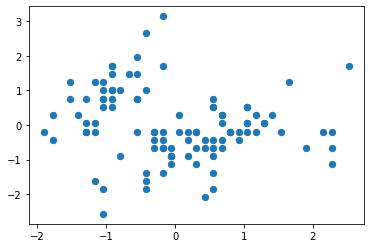

In [107]:
# приведем данные к единому масштабу
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# fit-transform сразу обучается и преобразует данные
x_scaled = scaler.fit_transform(x_train)
plt.scatter(x_scaled[:, 0], x_scaled[:, 1],cmap='autumn', s=40)

In [142]:
from sklearn.cluster import KMeans
# явно указываем на то количество кластеров, которое мы видим на визуале - 2
kmeans = KMeans(n_clusters=2)
# fit_predict обучается на данных и каждому объекту и присваивает кластер: первый или второй
clusters = kmeans.fit_predict(x_scaled)
clusters

array([1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0])

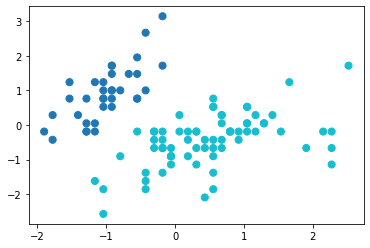

In [143]:
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], cmap='tab10_r', c=clusters, s=50)

Из визуализации видим, что программа правильно разделила данные по кластерам. Видна четкая линия разграничения между ними.

Для проверки правильности ручной простановки количества кластеров, проверим данный факт расчетом и визуалом ниже - построим график локтя.

In [144]:
# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 15)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(x_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

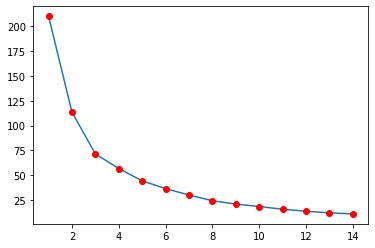

In [145]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Можно наглядно рассмотреть и выявить хорошую разность только между двумя кластерами, что мы и делали ранее. Третий признак не настолько различим от остальных.